# DATA ANALYST/SCIENTIST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Placement_Data_Collection(Responses).csv')
df.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,APPLIED PROFILE,PROJECT,INTERNSHIP,PLACED
0,Male,9.00,No,7,3,7,DATA SCIENTIST/ANALYST,Yes,No,No
1,Female,8.68,No,7,5,8,CORE,Yes,No,Yes
2,Male,8.34,No,7,5,7,"DATA SCIENTIST/ANALYST, CORE",Yes,Yes,No
3,Male,8.79,No,5,4,6,CORE,No,No,Yes
4,Male,7.58,No,9,9,10,"SDE, DATA SCIENTIST/ANALYST",Yes,No,Yes


In [3]:
df.isna().sum()

GENDER                 0
CGPA                   0
ACTIVE BACKLOG         0
COMMUNICATION SKILL    0
CODING SKILL           0
APTITUDE SKILLS        0
APPLIED PROFILE        0
PROJECT                0
INTERNSHIP             0
PLACED                 0
dtype: int64

In [4]:
df['PLACED'].value_counts()


Yes    102
No      49
Name: PLACED, dtype: int64

In [5]:
data = df.loc[(df['APPLIED PROFILE'] == 'DATA SCIENTIST/ANALYST') | (df['APPLIED PROFILE'] == 'SDE, DATA SCIENTIST/ANALYST') | (df['APPLIED PROFILE'] =='SDE, DATA SCIENTIST/ANALYST, MANAGEMENT, CORE')| (df['APPLIED PROFILE'] == 'DATA SCIENTIST/ANALYST,CORE')]
print(data.shape)
data.head()

(59, 10)


,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,APPLIED PROFILE,PROJECT,INTERNSHIP,PLACED
0,Male,9.00,No,7,3,7,DATA SCIENTIST/ANALYST,Yes,No,No
4,Male,7.58,No,9,9,10,"SDE, DATA SCIENTIST/ANALYST",Yes,No,Yes
5,Male,8.50,Yes,10,10,10,DATA SCIENTIST/ANALYST,Yes,Yes,Yes
9,Male,7.58,No,8,8,9,"SDE, DATA SCIENTIST/ANALYST",Yes,No,No
13,Male,8.12,No,9,9,9,"SDE, DATA SCIENTIST/ANALYST, MANAGEMENT, CORE",Yes,Yes,Yes


In [6]:
data.drop(['APPLIED PROFILE'], axis=1, inplace=True)

### Gender based analysis

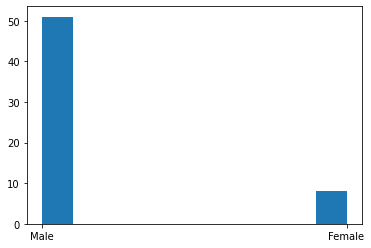

Number of males who sat for placement in DATA is 51
Number of males who got placed is 39
Number of females who sat for placement in DATA is 8
Number of females who got placed is 5


In [7]:
plt.hist(data['GENDER'])
plt.show()
print(f"Number of males who sat for placement in DATA is {data.loc[(data['GENDER'] == 'Male')].shape[0]}")
print(f"Number of males who got placed is {data.loc[(data['GENDER'] == 'Male') & (data['PLACED']=='Yes')].shape[0]}")
print(f"Number of females who sat for placement in DATA is {data.loc[(data['GENDER'] == 'Female')].shape[0]}")
print(f"Number of females who got placed is {data.loc[(data['GENDER'] == 'Female') & (data['PLACED']=='Yes')].shape[0]}")

P(placed|male) = 39/51 **i.e. 76% of the males got placed**

P(placed|female) = 5/8 **i.e. 62% of the females got placed**

### CGPA based analysis

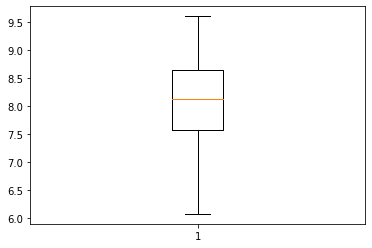

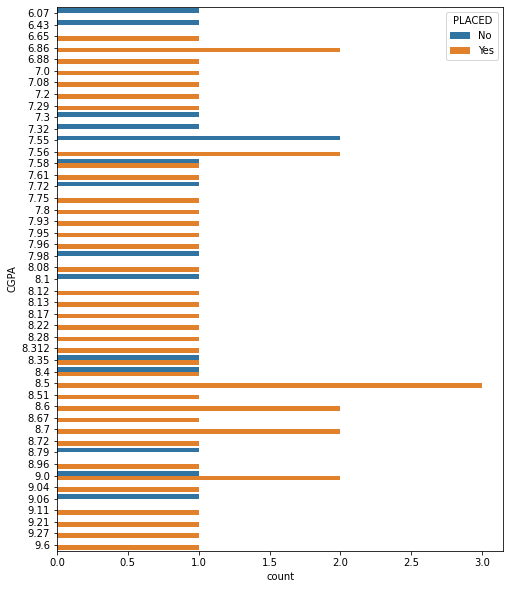

In [8]:
x=data['CGPA']
y=data['PLACED']
plt.boxplot(x)
plt.show()
plt.figure(figsize=(8,10))
sns.countplot(y=x,hue= y)
plt.show()


In [9]:
datacgpa = data.loc[(data['CGPA'] >=8)]
print(datacgpa.shape[0])

33


In [10]:
print('Number of student having cgpa >=8 and got placed is',datacgpa[datacgpa['PLACED']=='Yes'].shape[0])
print('Number of student having cgpa >=8 and are unplaced is',datacgpa[datacgpa['PLACED']=='No'].shape[0])

Number of student having cgpa >=8 and got placed is 27
Number of student having cgpa >=8 and are unplaced is 6


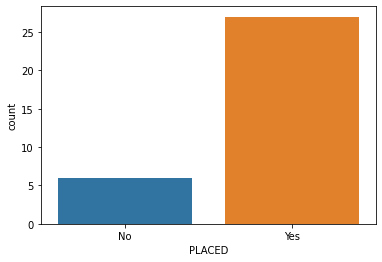

In [11]:
sns.countplot(datacgpa['PLACED'])
plt.show()

Probability(placed | pointer >= 8)  27/33  **i.e. 82% of students are placed**

Probability(not placed | pointer >= 8) = 6/33  **i.e. 18% of students are unplaced**

### Backlog based analysis

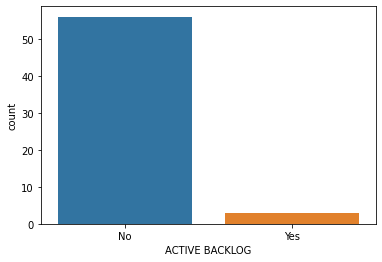

Number of students having backlog are  3
Number of students having backlog and placed are  3
Number of students having backlog and unplaced are  0


In [12]:
sns.countplot(data['ACTIVE BACKLOG'])
plt.show()
print('Number of students having backlog are ',data.loc[(data['ACTIVE BACKLOG'] == 'Yes')].shape[0])
print('Number of students having backlog and placed are ',data.loc[(data['ACTIVE BACKLOG'] == 'Yes') & (data['PLACED']=='Yes')].shape[0])
print('Number of students having backlog and unplaced are ',data.loc[(data['ACTIVE BACKLOG'] == 'Yes') & (data['PLACED']=='No')].shape[0])

***due to shortage of the data of backlog students so we cannot conclude anything from this analysis***

### Communication skill based analysis

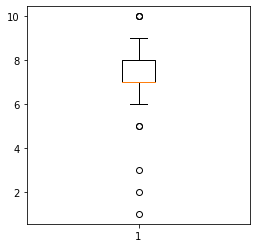

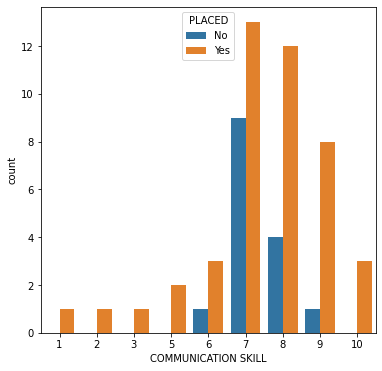

In [13]:
x1=data['COMMUNICATION SKILL']
y=data['PLACED']
plt.figure(figsize=(4,4))
plt.boxplot(x1)
plt.show()
plt.figure(figsize=(6,6))
sns.countplot(x1, hue=y)
plt.show()

In [14]:
datacom = data.loc[(data['COMMUNICATION SKILL'] >=7.0)]
print('number of students having Communication skills more than 7 is ',datacom.shape[0])

number of students having Communication skills more than 7 is  50


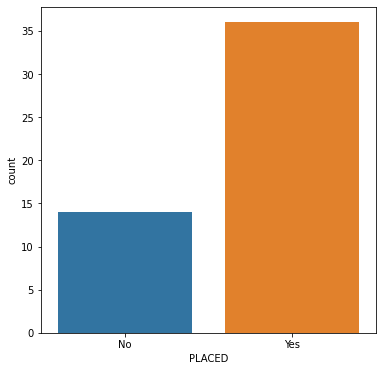

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(datacom['PLACED'])
plt.show()


P(placed| communication > 7.0) = 36/50 **i.e. 72% of the students with CS>=7 got placed**

P(not-placed| communication > 7.0) = 14/50 **i.e. 28% are unplaced**

### Coding skill based analysis

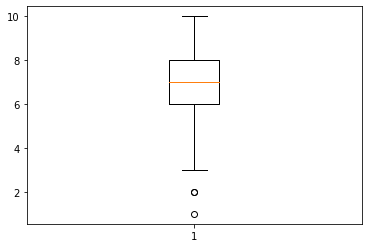

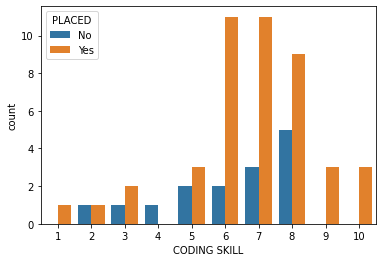

In [16]:
x2=data['CODING SKILL']
y=data['PLACED']
plt.boxplot(x2)
plt.show()
sns.countplot(x2, hue=y)
plt.show()


In [17]:
datacoding = data.loc[(data['CODING SKILL'] >=6.0)]
print('Number of students having coding skill more than 6 is',datacoding.shape[0])

Number of students having coding skill more than 6 is 47


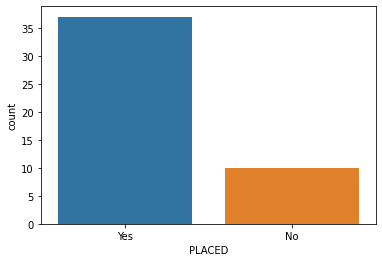

In [18]:
sns.countplot(datacoding['PLACED'])
plt.show()


P(placed | coding skills>=6.0) = 37/47 **i.e. 79% of the students having COS>=6 got placed**  
P(not placed | coding skills>=6.0) = 10/47 **i.e. 21% of the students are unplaced**

### Project based analysis

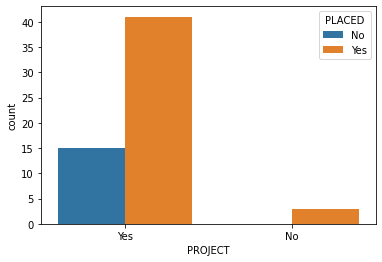

In [19]:
sns.countplot(data['PROJECT'],hue=data['PLACED'])
plt.show()

In [20]:
print('Number of students done the project in applied profile is',data[data['PROJECT']=='Yes'].shape[0])
print('Number of students done the project and are placed is',data[(data['PROJECT']=='Yes') & (data['PLACED']=='Yes')].shape[0])
print('Number of students who had not done the project and got placed is',data[(data['PROJECT']=='No') & (data['PLACED']=='Yes')].shape[0])

Number of students done the project in applied profile is 56
Number of students done the project and are placed is 41
Number of students who had not done the project and got placed is 3



Probability(placed | project) = 41/56  **i.e. 73% of the students who had done the  project in applied profile and are placed**

Probability(not placed |project) = 15/56 **i.e. 27% of the students who had done the project in applied profile and are not placed**

Probability(placed | no project) = 7/7 **i.e. 100% of the students who had not done the  project in applied profile and are placed** 

### Data preprocessing

In [21]:
data['PLACED'] = data['PLACED'].map({'Yes': 1, 'No': 0})


In [22]:
data['GENDER'] = data['GENDER'].map({'Male': 1, 'Female': 0})

In [23]:
data['PROJECT'] = data['PROJECT'].map({'Yes': 1, 'No': 0})
data['INTERNSHIP'] = data['INTERNSHIP'].map({'Yes': 1, 'No': 0})

In [24]:
data['ACTIVE BACKLOG'] = df['ACTIVE BACKLOG'].map({'Yes': 1, 'No': 0})

In [25]:
data.head()

,GENDER,CGPA,ACTIVE BACKLOG,COMMUNICATION SKILL,CODING SKILL,APTITUDE SKILLS,PROJECT,INTERNSHIP,PLACED
0,1,9.00,0,7,3,7,1,0,0
4,1,7.58,0,9,9,10,1,0,1
5,1,8.50,1,10,10,10,1,1,1
9,1,7.58,0,8,8,9,1,0,0
13,1,8.12,0,9,9,9,1,1,1


In [26]:
data.shape

(59, 9)

<AxesSubplot:>

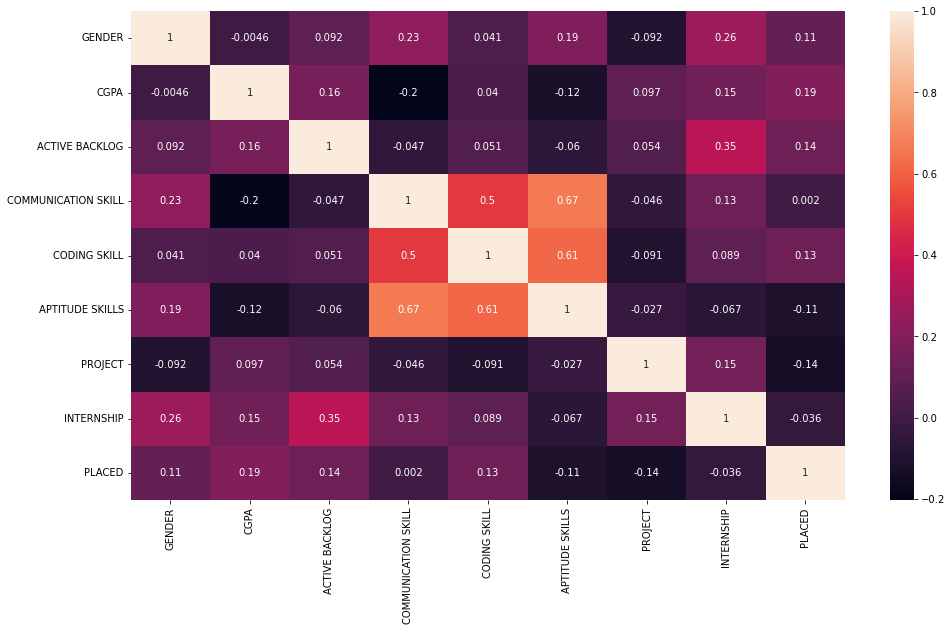

In [27]:
plt.figure(figsize=(16,9))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True) # correlation values are not giving correct values so dataset seems to be imbalanced


In [28]:
data_mino=data[data['PLACED']==0]
data_majo=data[data['PLACED']==1]

In [29]:
from sklearn.utils import resample

In [30]:
data_mino_up=resample(data_mino, replace=True,n_samples=len(data_majo),random_state=42)

In [31]:
data_mino_up['PLACED'].value_counts()

0    44
Name: PLACED, dtype: int64

In [32]:
data=pd.concat([data_mino_up,data_majo]).reset_index(drop=True)

In [33]:
data['PLACED'].value_counts()

0    44
1    44
Name: PLACED, dtype: int64

In [34]:
x=data.drop('PLACED',axis=1)

In [35]:
y=data[['PLACED']]

### Data splitting

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train ,y_test=train_test_split(x,y,test_size=0.33, random_state=32)

### Logistic regression

In [38]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [39]:
lg=LogisticRegression()

In [40]:
lg.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred_l=lg.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc=DecisionTreeClassifier()

In [51]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred_tree=dtc.predict(x_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier

### Random Forest

In [55]:
rf=RandomForestClassifier()

In [56]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred_rf=rf.predict(x_test)

*Random forest accuracy is coming around 94.4%*

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,y_pred_rf)

array([[16,  1],
       [ 1, 12]], dtype=int64)

In [61]:
from sklearn.metrics import precision_score 

In [62]:
precision_score(y_test, y_pred_l)

0.5789473684210527

In [63]:
precision_score(y_test, y_pred_tree)

0.7857142857142857

In [64]:
precision_score(y_test, y_pred_rf)

0.9230769230769231